# Pentautan ke Google Drive

In [1]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Library

In [2]:
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from sklearn.metrics import confusion_matrix ,accuracy_score,recall_score,precision_score,f1_score
from keras import optimizers
from tensorflow.keras import optimizers
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Import Datasets

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        validation_split=0.1) # menentukan jumlah persentase data validasi sebesar 40% dari total dataset

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Portofolio Project/Project 2_Klasifikasi Pneumonia/Dataset_new/',target_size=(128,128),color_mode='rgb',batch_size=30,shuffle=True,
        subset='training') # gunakan subset untuk menandai set data bertugas sebagai set data train

validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Portofolio Project/Project 2_Klasifikasi Pneumonia/Dataset_new/',batch_size=64,shuffle=False,target_size=(128,128), # sama dengan train generator
        subset='validation') # gunakan subset untuk menandai set data bertugas sebagai set data validation


Found 2753 images belonging to 2 classes.
Found 305 images belonging to 2 classes.


# Pembuatan Model ResNet50

In [4]:
# load the ResNet50V2 pretrained model
baseModel = ResNet50V2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(128, 128, 3)))

# construct the new head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel) # input layer
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel) # hidden layer
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel) # output layer


# place the new head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

# freeze the base model
for layer in baseModel.layers:
	layer.trainable = False

94668760/94668760 [==============================] - 1s 0us/step


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

In [6]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [7]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98):
      self.model.stop_training = True

stopTraining = Callback()

# Pelatihan Model

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=15,
                    callbacks=[stopTraining])

Epoch 1/15
92/92 [==============================] - 531s 6s/step - loss: 0.3195 - accuracy: 0.8787 - val_loss: 0.2516 - val_accuracy: 0.8984
Epoch 2/15
39/92 [===========>..................] - ETA: 1:37 - loss: 0.1961 - accuracy: 0.9218

# Prediksi Model

In [ ]:
predicts_vectors = model.predict_generator(validation_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


5/5 [==============================] - 23s 4s/step


# Validasi Model

In [ ]:
pred = np.argmax(predicts_vectors,axis=1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer ()

lb.fit(validation_generator.labels)

y_test = lb.transform (validation_generator.labels)
y_pred = lb.transform (pred)

In [ ]:
y_true = validation_generator.labels
y_pred = pred

recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
acc = accuracy_score(validation_generator.labels, pred)

In [ ]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1]


In [ ]:
print('>> Result <<')
print('Acc: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Acore: {}'.format(f1))

>> Result <<
Acc: 92.78688524590164
Recall: 92.79569892473118
Precision: 92.78465772273822
F1-Acore: 0.9278618732261116


In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       150
           1       0.93      0.92      0.93       155

    accuracy                           0.93       305
   macro avg       0.93      0.93      0.93       305
weighted avg       0.93      0.93      0.93       305



In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
conf = get_confusion_matrix(y_test, y_pred)
conf

array([[140,  10],
       [ 12, 143]])

Text(0.5, 15.0, 'Predicted label')

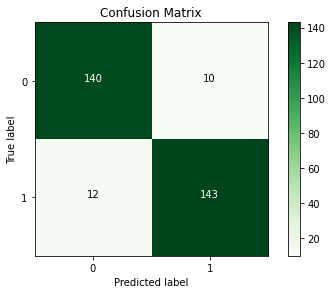

In [ ]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')